In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
# import csv
data = pd.read_csv("mbti_1.csv")
data.columns = ['type', 'posts']

In [5]:
import string
#calculating the average post length
data['avg_post_len'] = data['posts'].apply(lambda x: (len(x) - x.count(" "))/50)
data.head()

,type,posts,avg_post_len
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,81.50
1,ENTP,'I'm finding the lack of me in these posts ver...,117.20
2,INTP,'Good one _____ https://www.youtube.com/wat...,87.94
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",103.42
4,ENTJ,'You're fired.|||That's another silly misconce...,102.50


In [6]:
#calculating the total post length
data['tot_post_len'] = data['posts'].apply(lambda x: len(x) - x.count(" "))
data.head()

,type,posts,avg_post_len,tot_post_len
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,81.50,4075
1,ENTP,'I'm finding the lack of me in these posts ver...,117.20,5860
2,INTP,'Good one _____ https://www.youtube.com/wat...,87.94,4397
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",103.42,5171
4,ENTJ,'You're fired.|||That's another silly misconce...,102.50,5125


In [7]:
# calculating the punctuation percentage
def punct_count(post):
    count = sum([1 for char in post if char in string.punctuation])
    return round(count/(len(post) - post.count(" ")), 3)*100

data['punct_%'] = data['posts'].apply(lambda x: punct_count(x))
data.head()

,type,posts,avg_post_len,tot_post_len,punct_%
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,81.50,4075,12.7
1,ENTP,'I'm finding the lack of me in these posts ver...,117.20,5860,9.0
2,INTP,'Good one _____ https://www.youtube.com/wat...,87.94,4397,9.5
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",103.42,5171,8.9
4,ENTJ,'You're fired.|||That's another silly misconce...,102.50,5125,8.6


In [8]:
# calculating the avg punctuation percentage
# def punct_count(post):
#     count = sum([1 for char in post if char in string.punctuation])
#     return round((count/50)/((len(post) - post.count(" "))/50), 3)*100

# data['avg_punct_%'] = data['posts'].apply(lambda x: punct_count(x))
# data.head()

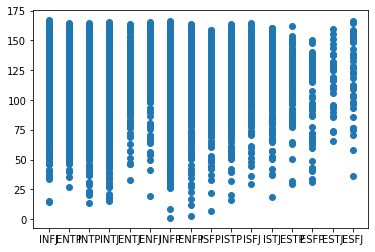

In [9]:
x = data['type']
y = data['avg_post_len']

plt.scatter(x, y)
plt.show()

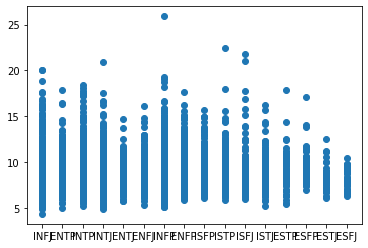

In [10]:
x = data['type']
y = data['punct_%']

plt.scatter(x, y)
plt.show()

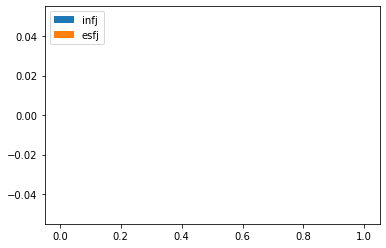

In [11]:
#bins = np.linspace(0,500,50)
plt.hist(data[data['type']=='infj']['avg_post_len'], label = 'infj')
plt.hist(data[data['type']=='esfj']['avg_post_len'], label = 'esfj')
plt.legend(loc = 'upper left')
plt.show()

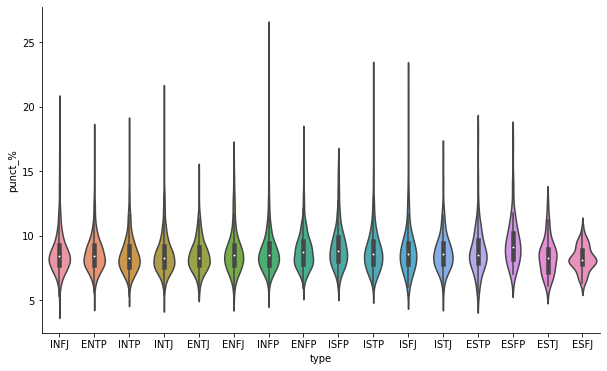

In [27]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 6)
ax = sns.violinplot(x='type', y='punct_%', data=data)
sns.despine()
#sns.catplot(x='type', y='avg_post_len', kind="swarm", data=data)
fig.savefig('violin_punct.png')

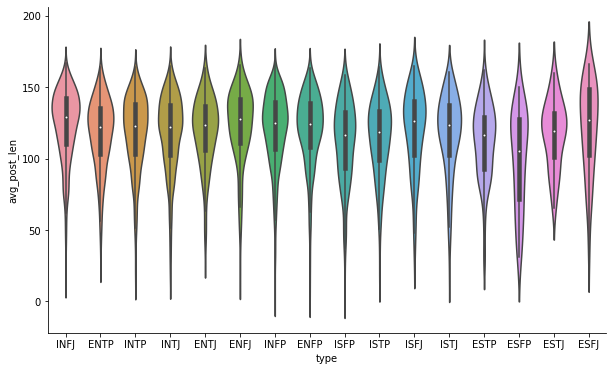

In [28]:
fig, ax = plt.subplots()

fig.set_size_inches(10, 6)
ax = sns.violinplot(x='type', y='avg_post_len', data=data)
sns.despine()
#sns.catplot(x='type', y='avg_post_len', kind="swarm", data=data)
fig.savefig('violin_avg_post_len.png')

<AxesSubplot:ylabel='type'>

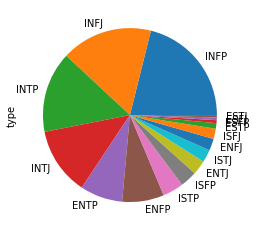

In [25]:
data['type'].value_counts().plot(kind = 'pie')

<AxesSubplot:>

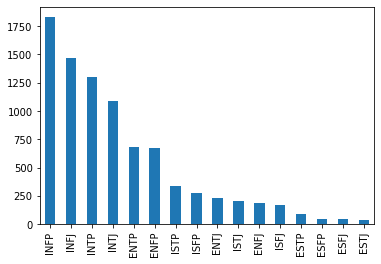

In [26]:
data['type'].value_counts().plot(kind = 'bar')